<a href="https://colab.research.google.com/github/chicot1k/colab/blob/main/2factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro
import scipy
import statistics as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels as sm

In [ ]:
df2 = pd.DataFrame({'advert_company':np.repeat(['advert_company_1','advert_company_2','advert_company_1','advert_company_2','advert_company_1','advert_company_2'],3), 'stores':np.repeat(['store_A','store_B','store_C'],6),'values':[12.05, 23.94, 14.63, 25.78, 17.52, 18.45, 15.17, 18.52, 19.57, 21.40, 13.59, 20.57, 9.48, 6.92, 10.47, 7.63, 11.90, 5.92]})

In [ ]:
df2


,advert_company,stores,values
0,advert_company_1,store_A,12.05
1,advert_company_1,store_A,23.94
2,advert_company_1,store_A,14.63
3,advert_company_2,store_A,25.78
4,advert_company_2,store_A,17.52
5,advert_company_2,store_A,18.45
6,advert_company_1,store_B,15.17
7,advert_company_1,store_B,18.52
8,advert_company_1,store_B,19.57
9,advert_company_2,store_B,21.40


 Тест на нормальное распределение Шапиро-Уилка

In [ ]:
shapiro(df2[df2['advert_company'] == 'advert_company_1' ]['values'])

ShapiroResult(statistic=0.975400984287262, pvalue=0.9365687370300293)

In [ ]:
shapiro(df2[df2['advert_company'] == 'advert_company_2' ]['values'])

ShapiroResult(statistic=0.965853214263916, pvalue=0.8571261763572693)

<ipython-input-21-0cc30a2abc6e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['advert_company'] == 'advert_company_1' ]['values'], bins = np.linspace(5,25,5).tolist())


<Axes: xlabel='values', ylabel='Density'>

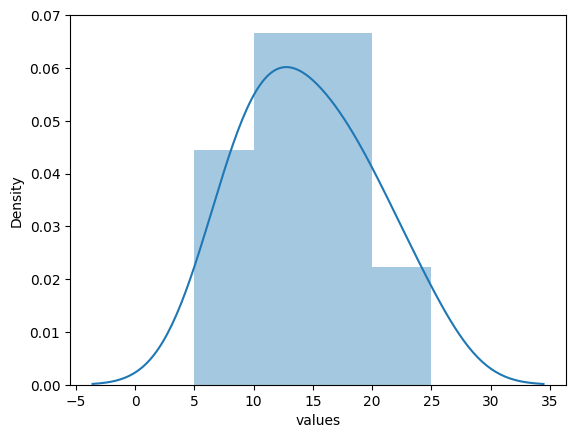

In [ ]:
sns.distplot(df2[df2['advert_company'] == 'advert_company_1' ]['values'], bins = np.linspace(5,25,5).tolist())

<ipython-input-23-3e078cefd663>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['advert_company'] == 'advert_company_2' ]['values'], bins = np.linspace(6,25,5).tolist())


<Axes: xlabel='values', ylabel='Density'>

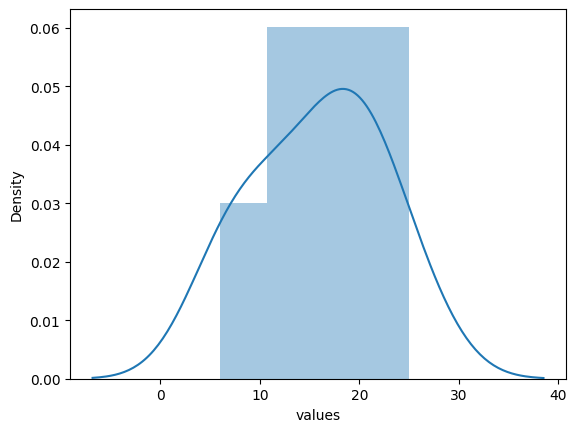

In [ ]:
sns.distplot(df2[df2['advert_company'] == 'advert_company_2' ]['values'], bins = np.linspace(6,25,5).tolist())

In [ ]:

x = df2[df2['advert_company'] == 'advert_company_1' ]['values']
y = df2[df2['advert_company'] == 'advert_company_2' ]['values']
f = np.var(x, ddof=1)/np.var(y, ddof=1) 
dfn = x.size-1 
dfd = y.size-1 
p = 1-scipy.stats.f.cdf(f, dfn, dfd) 
print('p-value =',p)



p-value = 0.7016981346259358


In [ ]:
test_leven, p = scipy.stats.levene(df2[df2['advert_company'] == 'advert_company_1' ]['values'], df2[df2['advert_company'] == 'advert_company_2' ]['values'])
print('Statistics=%.3f, p-value=%.3f' % (test_leven, p))
alpha = 0.05
if p < alpha:
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')



Statistics=0.352, p-value=0.561
Принять гипотезу о равенстве дисперсий


In [ ]:
model = ols('values ~ C(advert_company) + C(stores) + C(advert_company):C(stores)', data = df2).fit()
model
sm.stats.anova.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(advert_company),8.013339,1.0,0.500252,0.492897
C(stores),378.380833,2.0,11.810663,0.001462
C(advert_company):C(stores),13.850544,2.0,0.432327,0.658717
Residual,192.223333,12.0,NaN,NaN
